In [1]:
import os
from shutil import copyfile
path='../input/lung-ct/CT_COVID/CT_COVID/'
outpath = './'
if (not os.path.exists(outpath+'LUNG_COVID/')):
    os.mkdir(outpath+'LUNG_COVID/')
    os.mkdir(outpath+'LUNG_COVID/CT_COVID/')
    os.mkdir(outpath+'LUNG_COVID/CT_NonCOVID/')
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =outpath+'LUNG_COVID/CT_COVID/'+ dst 
        
    # rename() function will 
    # rename all the files 
    copyfile(src, dst)
print("Covid Positive cases: ", count)

path='../input/lung-ct/CT_NonCOVID/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =outpath+'LUNG_COVID/CT_NonCOVID/'+ dst 
        
    # rename() function will 
    # rename all the files 
    copyfile(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


In [2]:
base_dir = './LUNG_COVID/data'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):os.mkdir(test_dir)

In [4]:
original_dataset_dir_covid = './LUNG_COVID/CT_COVID/'
original_dataset_dir_non_covid = './LUNG_COVID/CT_NonCOVID/'

import shutil
fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_dir, fname)
    print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

./LUNG_COVID/CT_COVID/covid-0.png ./LUNG_COVID/data/train/covid-0.png
./LUNG_COVID/CT_COVID/covid-1.png ./LUNG_COVID/data/train/covid-1.png
./LUNG_COVID/CT_COVID/covid-2.png ./LUNG_COVID/data/train/covid-2.png
./LUNG_COVID/CT_COVID/covid-3.png ./LUNG_COVID/data/train/covid-3.png
./LUNG_COVID/CT_COVID/covid-4.png ./LUNG_COVID/data/train/covid-4.png
./LUNG_COVID/CT_COVID/covid-5.png ./LUNG_COVID/data/train/covid-5.png
./LUNG_COVID/CT_COVID/covid-6.png ./LUNG_COVID/data/train/covid-6.png
./LUNG_COVID/CT_COVID/covid-7.png ./LUNG_COVID/data/train/covid-7.png
./LUNG_COVID/CT_COVID/covid-8.png ./LUNG_COVID/data/train/covid-8.png
./LUNG_COVID/CT_COVID/covid-9.png ./LUNG_COVID/data/train/covid-9.png
./LUNG_COVID/CT_COVID/covid-10.png ./LUNG_COVID/data/train/covid-10.png
./LUNG_COVID/CT_COVID/covid-11.png ./LUNG_COVID/data/train/covid-11.png
./LUNG_COVID/CT_COVID/covid-12.png ./LUNG_COVID/data/train/covid-12.png
./LUNG_COVID/CT_COVID/covid-13.png ./LUNG_COVID/data/train/covid-13.png
./LUNG_COVID

In [5]:
fnames = ['noncovid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [7]:
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'covid': return 1
    elif word_label == 'noncovid': return 0

In [8]:

def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [9]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(500, 224, 224, 3)
(100, 224, 224, 3)
(96, 224, 224, 3)


In [10]:
## VGG 16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

2021-09-15 02:39:36.761569: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [11]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

2021-09-15 02:39:41.478357: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-15 02:39:41.482311: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-15 02:39:41.532914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-15 02:39:41.534140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-15 02:39:41.534217: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-15 02:39:41.585982: I tensorflow/stream_executor/platform/def

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [12]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(1, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
import tensorflow
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
#opt = tensorflow.keras.optimizers.SGD(learning_rate=lr_schedule)
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [15]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=100, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

2021-09-15 02:39:51.299545: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-15 02:39:51.312391: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/100


2021-09-15 02:39:52.191708: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-15 02:39:53.089229: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-15 02:39:53.117797: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


25/25 [==============================] - 12s 96ms/step - loss: 4.8896 - acc: 0.5814 - val_loss: 0.6550 - val_acc: 0.6800
Epoch 2/100
25/25 [==============================] - 2s 70ms/step - loss: 0.8110 - acc: 0.7721 - val_loss: 0.5731 - val_acc: 0.7500
Epoch 3/100
25/25 [==============================] - 2s 65ms/step - loss: 0.3026 - acc: 0.8751 - val_loss: 0.4424 - val_acc: 0.8200
Epoch 4/100
25/25 [==============================] - 2s 66ms/step - loss: 0.1769 - acc: 0.9244 - val_loss: 0.4459 - val_acc: 0.8400
Epoch 5/100
25/25 [==============================] - 2s 67ms/step - loss: 0.0770 - acc: 0.9866 - val_loss: 0.6002 - val_acc: 0.8400
Epoch 6/100
25/25 [==============================] - 2s 66ms/step - loss: 0.0781 - acc: 0.9781 - val_loss: 0.5458 - val_acc: 0.8600
Epoch 7/100
25/25 [==============================] - 2s 66ms/step - loss: 0.0287 - acc: 0.9950 - val_loss: 0.9500 - val_acc: 0.7900
Epoch 8/100
25/25 [==============================] - 2s 66ms/step - loss: 0.0370 - acc:

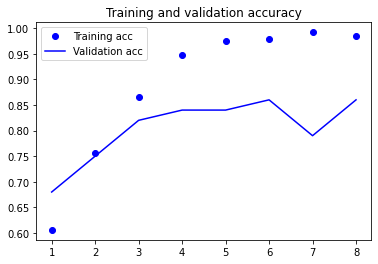

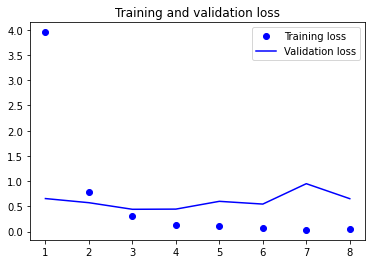

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:

from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)


Train Accuracy:	 0.984000027179718
Val Accuracy:	 0.8600000143051147
Test Accuracy:	 0.8125
Precision:	 0.7884615384615384
Recall:		 0.8541666666666666
F1 Score:	 0.8200000000000001
AUC:		 0.8124999999999999
